In [4]:
import torch
from model import VaeInnModel

BATCH_SIZE = 20 # create BATCH_SIZE images in total

model = VaeInnModel()
model.load_state_dict(torch.load("model.pt"))
model.eval()
model.cuda()
#model.encoder(torch.randn(1,3,16,16).cuda()).shape
samples = model.innmodule.inn.inverse(torch.randn(BATCH_SIZE, 64).cuda()).detach()
samples = samples.reshape((BATCH_SIZE,4,4,4)) # for cifar10 dataset
samples.shape

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


torch.Size([20, 4, 2, 2])

In [5]:
decoded_img = model.encoder.sd_vae.tiled_decode(samples)
decoded_img.sample.shape

torch.Size([20, 3, 16, 16])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


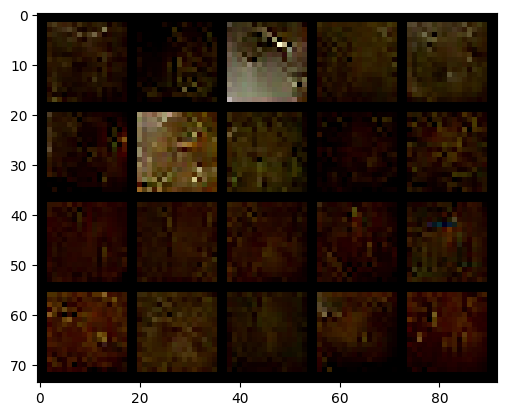

In [6]:
import torchvision
import matplotlib.pyplot as plt

#decoded_img = torch.zeros((BATCH_SIZE,3,32,32))
grid_img = torchvision.utils.make_grid(decoded_img.sample.cpu(), nrow=5)
plt.imshow(grid_img.permute(1, 2, 0))
